In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import geoplot 
import geopandas
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import contextily as ctx

In [2]:
df = pd.read_pickle("vancouver_crime_data_years_cleaned.pickle")

In [3]:
geo_df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))

In [32]:
geo_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,lat,lon,geometry
332792,Theft from Vehicle,2003,1,1,0,0,11XX HOWE ST,Central Business District,490849.968896,5.458443e+06,49.278669,-123.125802,POINT (-123.12580 49.27867)
446568,Theft from Vehicle,2003,1,1,0,0,57XX CULLODEN ST,Sunset,494285.250114,5.453255e+06,49.232045,-123.078497,POINT (-123.07850 49.23205)
31200,Break and Enter Commercial,2003,1,1,0,0,64XX VICTORIA DR,Victoria-Fraserview,495220.946580,5.452631e+06,49.226445,-123.065637,POINT (-123.06564 49.22644)
554175,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,492231.061741,5.458546e+06,49.279617,-123.106816,POINT (-123.10682 49.27962)
547974,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,487421.313408,5.457307e+06,49.268399,-123.172906,POINT (-123.17291 49.26840)


In [5]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,lat,lon
332792,Theft from Vehicle,2003,1,1,0,0,11XX HOWE ST,Central Business District,490849.968896,5.458443e+06,49.278669,-123.125802
446568,Theft from Vehicle,2003,1,1,0,0,57XX CULLODEN ST,Sunset,494285.250114,5.453255e+06,49.232045,-123.078497
31200,Break and Enter Commercial,2003,1,1,0,0,64XX VICTORIA DR,Victoria-Fraserview,495220.946580,5.452631e+06,49.226445,-123.065637
554175,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,492231.061741,5.458546e+06,49.279617,-123.106816
547974,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,487421.313408,5.457307e+06,49.268399,-123.172906


In [4]:
van_geo = geopandas.read_file("local-area-boundary.geojson")

In [50]:
van_geo.geometry

0     POLYGON ((-123.15260 49.25723, -123.16488 49.2...
1     POLYGON ((-123.11227 49.29016, -123.10424 49.2...
2     POLYGON ((-123.14599 49.25712, -123.14540 49.2...
3     POLYGON ((-123.07702 49.29025, -123.06778 49.2...
4     POLYGON ((-123.05649 49.29349, -123.05190 49.2...
5     POLYGON ((-123.10696 49.20416, -123.11153 49.2...
6     POLYGON ((-123.10562 49.23312, -123.11617 49.2...
7     POLYGON ((-123.15527 49.23452, -123.15508 49.2...
8     POLYGON ((-123.09929 49.28927, -123.09390 49.2...
9     POLYGON ((-123.13768 49.27532, -123.14126 49.2...
10    POLYGON ((-123.17017 49.24789, -123.17025 49.2...
11    POLYGON ((-123.17908 49.21556, -123.17564 49.2...
12    POLYGON ((-123.02356 49.20015, -123.03998 49.2...
13    POLYGON ((-123.13768 49.27532, -123.14375 49.2...
14    POLYGON ((-123.11599 49.23794, -123.11617 49.2...
15    POLYGON ((-123.05683 49.20420, -123.05846 49.2...
16    POLYGON ((-123.05659 49.26198, -123.05663 49.2...
17    POLYGON ((-123.10067 49.26913, -123.09692 

In [40]:
gvrd_geo = geopandas.read_file("GVRD_geojson.json")

In [55]:
geo_df.MONTH.min()

1

In [121]:
geo_df.groupby(['YEAR', 'MONTH']).size()

YEAR  MONTH
2003  1        4031
      2        3241
      3        3590
      4        3935
      5        4310
               ... 
2019  9        3543
      10       3548
      11       3242
      12       2981
2020  1        2112
Length: 205, dtype: int64

In [5]:
test = geo_df.loc[(geo_df.YEAR == 2019) & (geo_df.MONTH == 1)]
van_geo_crs = van_geo.to_crs(epsg=3857)

In [6]:
test.crs = 4326
test_crs = test.to_crs(epsg=3857)

In [27]:
geo_df.crs = 4326
geo_df_crs = geo_df.to_crs(epsg=3857)

In [29]:
minx, miny, maxx, maxy = geo_df_crs.geometry.total_bounds

processing year 2003
processing year 2004
processing year 2005
processing year 2006
processing year 2007
processing year 2008
processing year 2009
processing year 2010
processing year 2011
processing year 2012
processing year 2013
processing year 2014
processing year 2015
processing year 2016
processing year 2017
processing year 2018
processing year 2019
processing year 2020


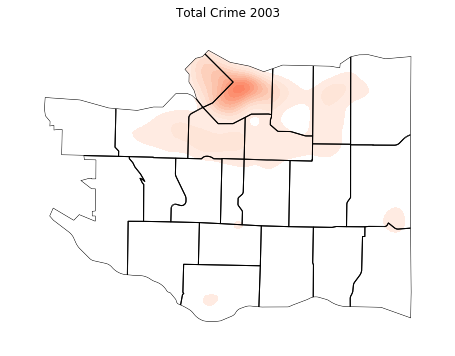

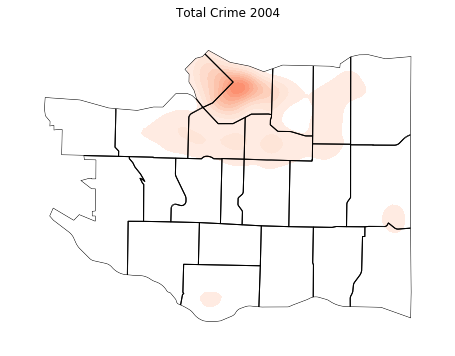

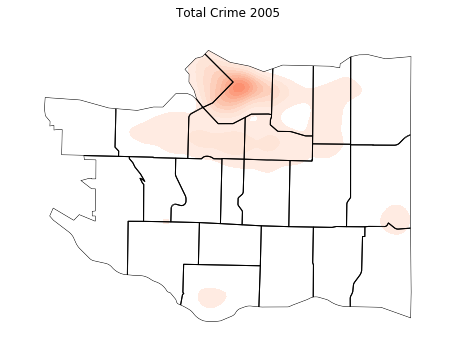

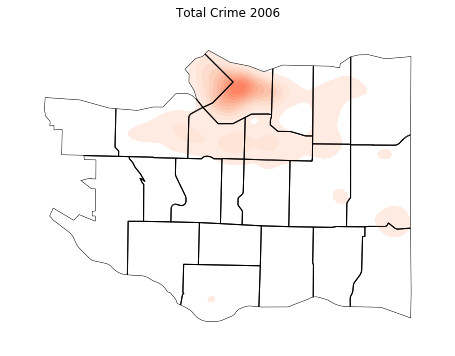

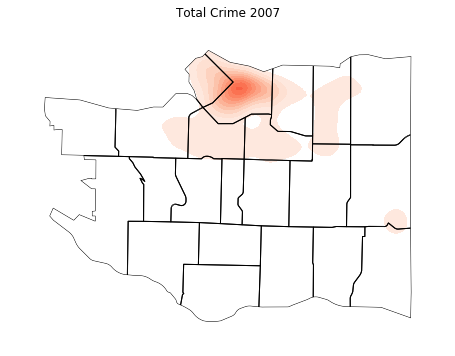

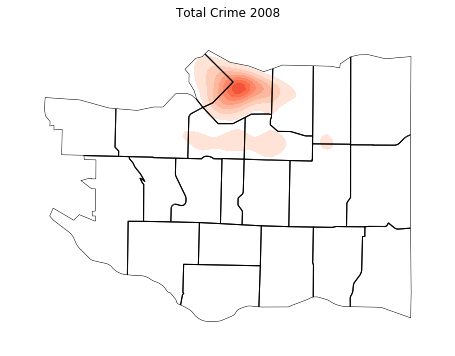

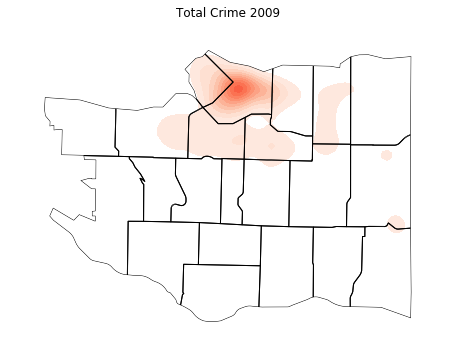

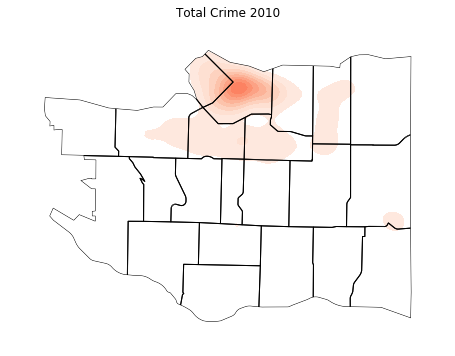

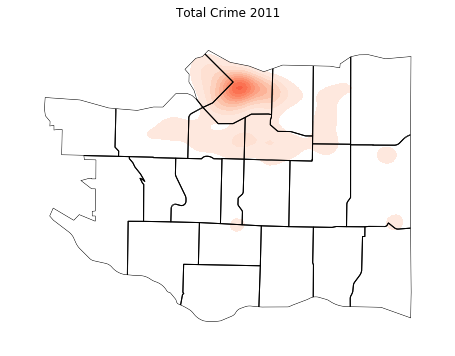

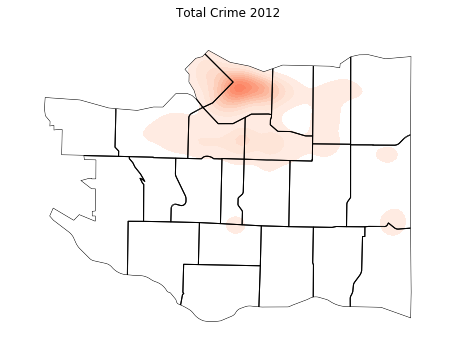

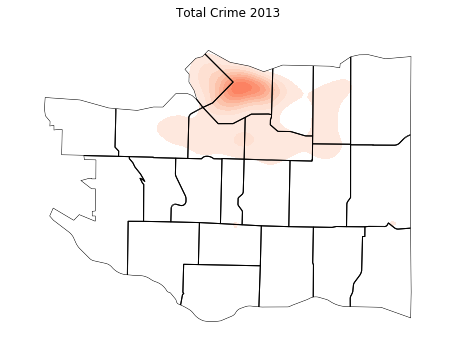

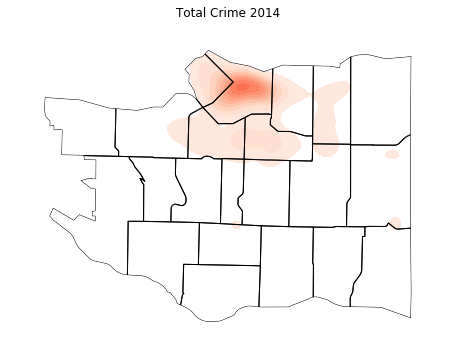

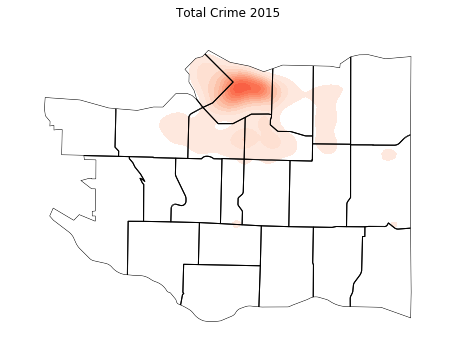

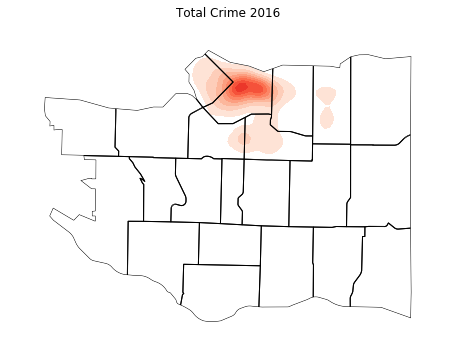

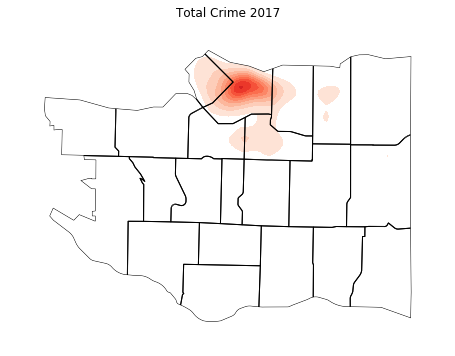

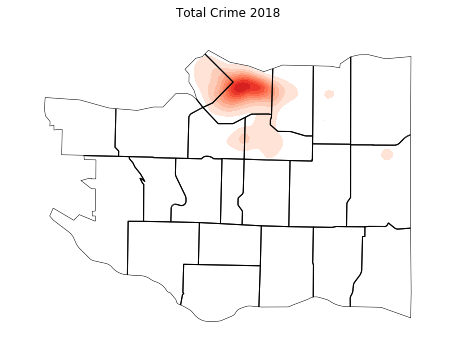

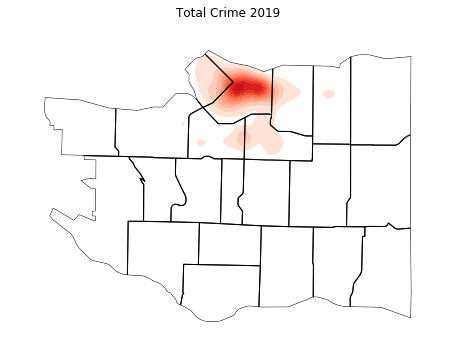

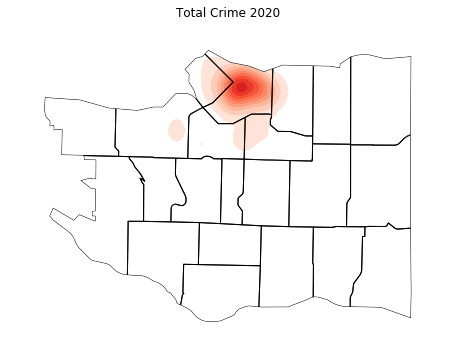

In [145]:
# save all image
counter = 0
for year in range(2003, 2021):
    print('processing year', year)
#     for month in range(1,13):
#         print('working {} {}'.format(year, month))
    temp_df = geo_df.loc[(geo_df['YEAR'] == year)]
    ax = geoplot.kdeplot(temp_df,clip=van_geo.geometry,shade=True,
                         cmap="Reds",projection=geoplot.crs.AlbersEqualArea(),figsize=(10,6), vmin=0, vmax=2000)
    ax = geoplot.polyplot(van_geo, ax=ax, zorder=1)
    ax.set_title("Total Crime {}".format(year))
    plt.savefig("crime_points/yearly_heatmap/{}.png".format(counter))
    plt.close()
    counter += 1

Graph individual points by event type

In [33]:
# save all image
counter = 0
for year in range(2003, 2021):
    for month in range(1,13):
        print('working {} {}'.format(year, month))
        temp_df = geo_df.loc[(geo_df['YEAR'] == year) & (geo_df['MONTH'] ==  month)]
        temp_df.crs = 4326
        temp_df = temp_df.to_crs(epsg=3857)

        # get categories
        theft = temp_df.loc[temp_df['TYPE'].isin(['Theft of Vehicle', 'Theft from Vehicle',
                                                   'Theft of Bicycle', 'Other Theft'])]
        be = temp_df.loc[temp_df['TYPE'].isin(['Break and Enter Commercial', 'Break and Enter Residential/Other'])]
        mischief = temp_df.loc[temp_df['TYPE'] == "Mischief"]
        vehicle = temp_df.loc[temp_df['TYPE'].isin(['Vehicle Collision or Pedestrian Struck (with Injury)',
                                                   'Vehicle Collision or Pedestrian Struck (with Fatality)'])]
        
        ax = theft.plot(figsize=(15,15), alpha=0.2, color='brown', label='All Theft')
        ax = be.plot(ax=ax, alpha=0.25, color='blue', label='Break and Enter')
        ax = mischief.plot(ax=ax, alpha=0.4, color='#ebab34', label='Mischief')
        ax = vehicle.plot(ax=ax, alpha=0.5, color='#34bdeb', label='Vehicle or Pedestrian Collision')

        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        ax.set_title('Crimes {} {}'.format(year, month))
        plt.legend()
        
        ctx.add_basemap(ax)
        
        plt.savefig("crime_points/scatter_all/{}.png".format(counter))
        plt.close()
        counter += 1
    

working 2003 1
working 2003 2
working 2003 3
working 2003 4
working 2003 5
working 2003 6
working 2003 7
working 2003 8
working 2003 9
working 2003 10
working 2003 11
working 2003 12
working 2004 1
working 2004 2
working 2004 3
working 2004 4
working 2004 5
working 2004 6
working 2004 7
working 2004 8
working 2004 9
working 2004 10
working 2004 11
working 2004 12
working 2005 1
working 2005 2
working 2005 3
working 2005 4
working 2005 5
working 2005 6
working 2005 7
working 2005 8
working 2005 9
working 2005 10
working 2005 11
working 2005 12
working 2006 1
working 2006 2
working 2006 3
working 2006 4
working 2006 5
working 2006 6
working 2006 7
working 2006 8
working 2006 9
working 2006 10
working 2006 11
working 2006 12
working 2007 1
working 2007 2
working 2007 3
working 2007 4
working 2007 5
working 2007 6
working 2007 7
working 2007 8
working 2007 9
working 2007 10
working 2007 11
working 2007 12
working 2008 1
working 2008 2
working 2008 3
working 2008 4
working 2008 5
working 20

C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 2


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 3


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 4


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 5


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 6


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 7


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 8


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 9


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 10


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 11


C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\geopandas\plotting.py:487: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

No handles with labels found to put in legend.


working 2020 12


In [189]:
test.loc[test['TYPE'].isin(['Theft from Vehicle', 'Theft of Vehicle'])].TYPE.unique()

array(['Theft from Vehicle', 'Theft of Vehicle'], dtype=object)

Prepare data for layers on Mapbox. Explore only 2019

In [36]:
df_2019 = geo_df.loc[geo_df['YEAR'] == 2019]

In [38]:
df_2019.to_csv("2019_crime_data.csv")

In [50]:
df_2019.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'lat', 'lon', 'geometry'],
      dtype='object')

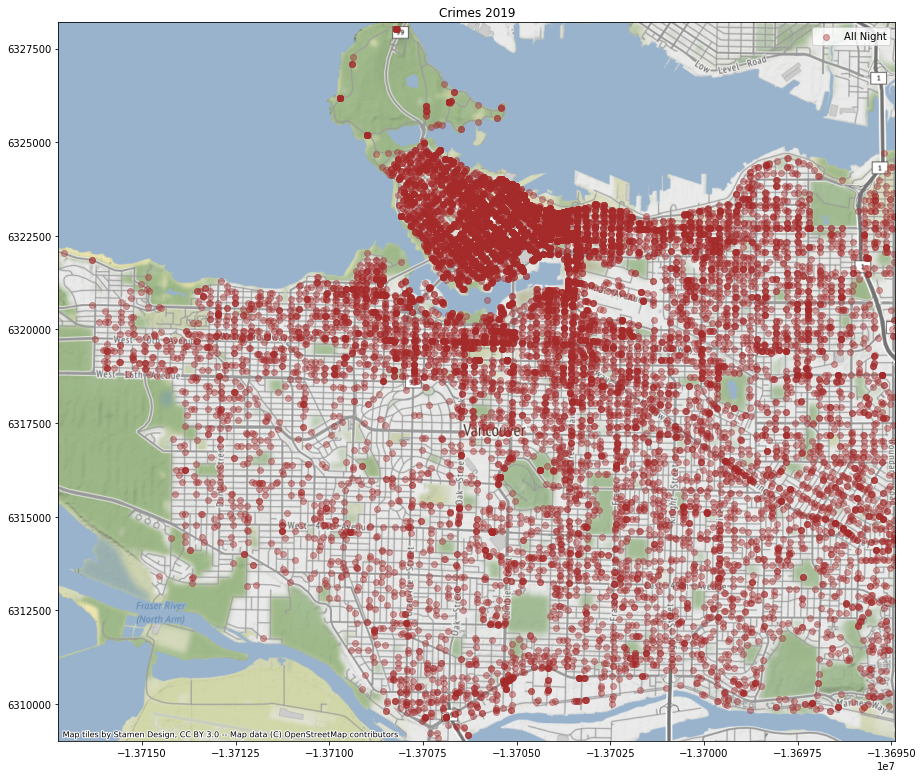

In [54]:
temp_df = df_2019
temp_df.crs = 4326
temp_df = temp_df.to_crs(epsg=3857)

# get categories
night = temp_df.loc[(temp_df['TYPE'] == "Theft from Vehicle") & (temp_df['HOUR'] >0) & (temp_df['HOUR'] <8)]
morning = temp_df.loc[(temp_df['TYPE'] == "Theft from Vehicle") & (temp_df['HOUR'] >=8)]

ax = theft.plot(figsize=(15,15), alpha=0.4, color='brown', label='All Night')
ax = mischief.plot(ax=ax, alpha=0.3, color='#ebab34', label='Morning')

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title('Crimes {}'.format(2019))
plt.legend()

ctx.add_basemap(ax)

In [45]:
df_stanley_cup = geo_df.loc[(geo_df['YEAR'] == 2011) & (geo_df['MONTH'] == 6)]

In [49]:
df_stanley_cup.TYPE.value_counts()

Mischief                                                  806
Theft from Vehicle                                        521
Break and Enter Commercial                                303
Other Theft                                               300
Break and Enter Residential/Other                         249
Theft of Bicycle                                          174
Theft of Vehicle                                          123
Vehicle Collision or Pedestrian Struck (with Injury)      100
Vehicle Collision or Pedestrian Struck (with Fatality)      3
Name: TYPE, dtype: int64

Get yearly distribution of types of crime

In [59]:
yearly_types_of_crime = []

for i in range(2003,2020):
    yearly_types_of_crime.append(geo_df.loc[geo_df['YEAR'] == i].TYPE.value_counts())

In [60]:
yearly_types_df = pd.concat((yearly_types_of_crime), axis=1)
yearly_types_df

C:\Users\Oliver\Anaconda3\envs\data_sci\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE,TYPE
Break and Enter Commercial,3197,3283,2638,2844,2434,2224,1858,1657,1749,1686,1774,2244,2457,2685,2193,2025,2437
Break and Enter Residential/Other,6883,6536,5542,5672,4996,4430,3497,3270,3231,3311,3025,3044,3120,2996,2468,2397,2298
Mischief,6351,5579,5031,5170,4797,5261,4420,4486,4812,4234,4173,4509,4177,4582,5376,5719,5831
Other Theft,2581,2604,2609,2966,3024,3142,3662,3431,3561,3630,3488,4210,4678,5701,5500,4947,5629
Theft from Vehicle,17286,17835,16264,14580,12152,11231,9956,8567,7404,8065,8299,10099,10482,12745,12906,14946,16844
Theft of Bicycle,1408,1216,1402,1456,1197,1167,1633,1662,1515,1813,2034,2449,3057,2632,2195,2159,2184
Theft of Vehicle,6352,6092,5021,3676,3300,2413,1878,1466,1090,1149,1031,1292,1371,1478,1494,1146,1375
Vehicle Collision or Pedestrian Struck (with Fatality),24,22,32,20,24,17,14,10,11,18,15,13,14,15,13,13,15
Vehicle Collision or Pedestrian Struck (with Injury),1803,1868,1983,1383,1237,1185,1278,1327,1261,1472,1486,1577,1667,1706,1522,1474,1119


In [61]:
yearly_types_df.columns = [i for i in range(2003, 2020)]

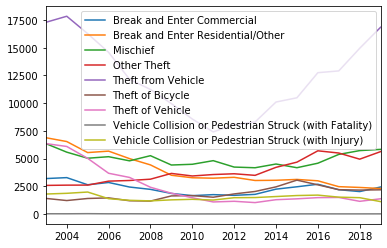

In [64]:
yearly_types_df.T.plot.line()